# Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Load Dataset

In [15]:
df = pd.read_csv("customer.csv")
df


,Age,Annual_Income,Spending_Score,Monthly_Visits,Gender,Preferred_Product
0,56,26102,85,6,Female,Clothing
1,46,70336,75,18,Male,Home
2,32,105314,36,10,Male,Groceries
3,60,46641,99,5,Female,Electronics
4,25,54584,19,10,Male,Electronics
...,...,...,...,...,...,...
345,48,87641,37,12,Female,Home
346,52,56395,11,12,Male,Home
347,50,42700,77,19,Male,Clothing
348,38,54620,3,6,Female,Electronics


In [16]:
df.isnull().sum()

Age                  0
Annual_Income        0
Spending_Score       0
Monthly_Visits       0
Gender               0
Preferred_Product    0
dtype: int64

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                350 non-null    int64 
 1   Annual_Income      350 non-null    int64 
 2   Spending_Score     350 non-null    int64 
 3   Monthly_Visits     350 non-null    int64 
 4   Gender             350 non-null    object
 5   Preferred_Product  350 non-null    object
dtypes: int64(4), object(2)
memory usage: 16.5+ KB


In [19]:
df.describe()

,Age,Annual_Income,Spending_Score,Monthly_Visits
count,350.000000,350.000000,350.000000,350.000000
mean,41.202857,71213.274286,49.571429,9.522857
std,13.422450,29311.239749,29.602801,5.584290
min,18.000000,20412.000000,1.000000,1.000000
25%,30.000000,45981.750000,24.000000,5.000000
50%,42.000000,71990.500000,51.000000,9.000000
75%,52.000000,97945.500000,75.000000,14.000000
max,64.000000,119835.000000,99.000000,19.000000


# Data Preprocessing

In [20]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


# Define Feature and Target

In [21]:
X = df[['Age','Annual_Income','Monthly_Visits','Gender']]
y = df['Spending_Score']


# Split data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [23]:
X_train

,Age,Annual_Income,Monthly_Visits,Gender
228,39,91180,16,0
78,40,93523,6,0
90,46,52217,15,1
16,39,102074,15,0
66,46,68747,6,0
...,...,...,...,...
71,27,78335,8,0
106,52,23343,5,0
270,26,41689,2,0
348,38,54620,6,0


In [25]:
X_test

,Age,Annual_Income,Monthly_Visits,Gender
157,46,50977,2,1
341,54,48016,3,1
315,55,46790,8,1
234,33,61555,7,1
155,32,71991,11,0
...,...,...,...,...
94,42,21150,8,0
181,30,23373,19,0
179,18,106027,1,0
199,29,58513,4,1


In [26]:
y_train

228     8
78     98
90     53
16     16
66     49
       ..
71     89
106    62
270    67
348     3
102    51
Name: Spending_Score, Length: 280, dtype: int64

In [27]:
y_test

157    29
341    90
315     4
234    86
155    81
       ..
94     74
181     4
179    16
199    42
326    26
Name: Spending_Score, Length: 70, dtype: int64

# Linear Regression

In [28]:
lr = LinearRegression()
lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)


In [29]:
lr

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# LR Evaluation

In [30]:
print("LINEAR REGRESSION RESULTS")
print("MAE:", mean_absolute_error(y_test, lr_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("R2:", r2_score(y_test, lr_pred))


LINEAR REGRESSION RESULTS
MAE: 25.980477024608795
RMSE: 29.40582040362154
R2: 0.01167754719987657


# Decision Tree

In [31]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train,y_train)

dt_pred = dt.predict(X_test)


In [32]:
dt

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


# DT Evaluation

In [33]:
print("DECISION TREE RESULTS")
print("MAE:", mean_absolute_error(y_test, dt_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, dt_pred)))
print("R2:", r2_score(y_test, dt_pred))


DECISION TREE RESULTS
MAE: 30.98755465708295
RMSE: 35.847760343937054
R2: -0.4687778547509218


# Visualization

# Linear Regression

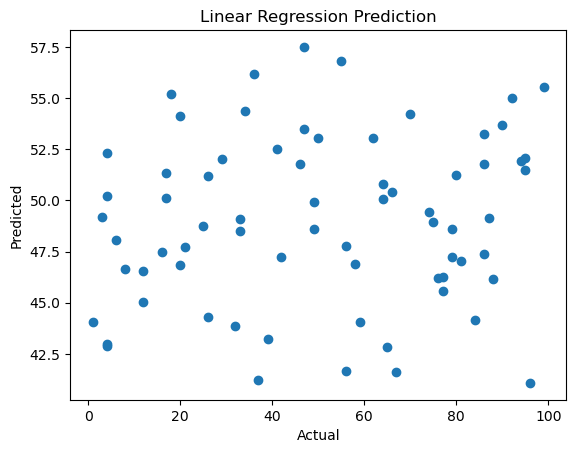

In [34]:
plt.scatter(y_test, lr_pred)
plt.title("Linear Regression Prediction")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


# Decision Tree

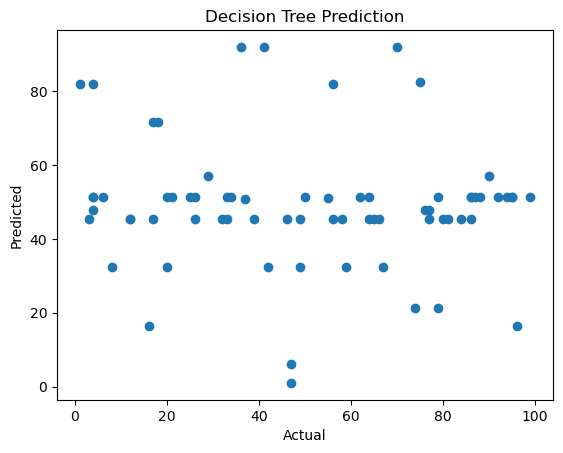

In [35]:
plt.scatter(y_test, dt_pred)
plt.title("Decision Tree Prediction")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


# Model Comparison

In [36]:
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))

print("LR RMSE:", lr_rmse)
print("DT RMSE:", dt_rmse)


LR RMSE: 29.40582040362154
DT RMSE: 35.847760343937054


# Select Best Model

In [37]:
if dt_rmse < lr_rmse:
    best_model = dt
    print("Decision Tree Selected")
else:
    best_model = lr
    print("Linear Regression Selected")


Linear Regression Selected


# Save Best Model

In [38]:
pickle.dump(best_model, open("model.pkl","wb"))
print("Model saved successfully!")


Model saved successfully!
